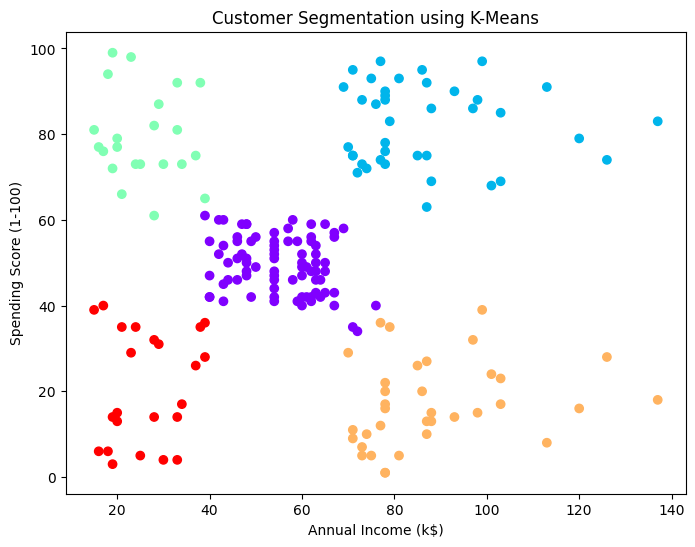

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


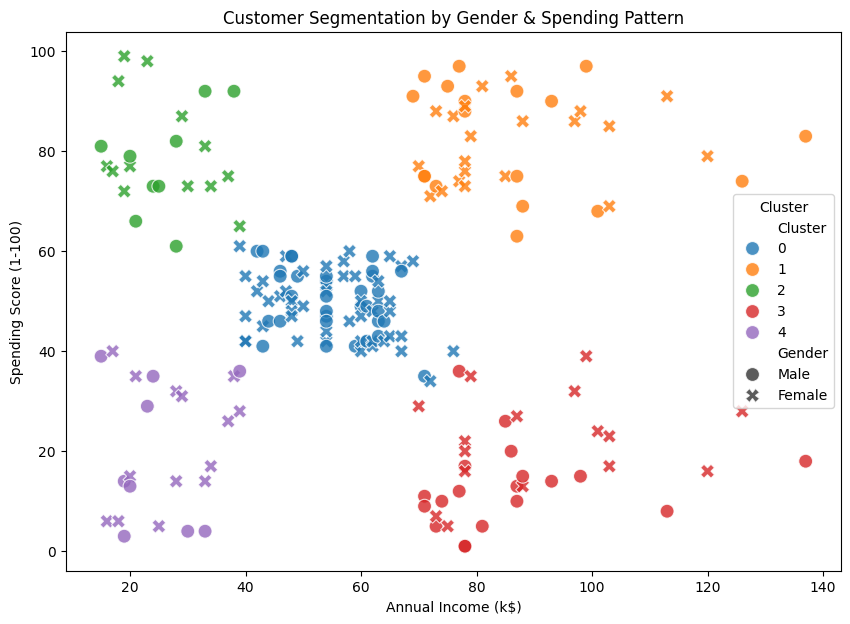

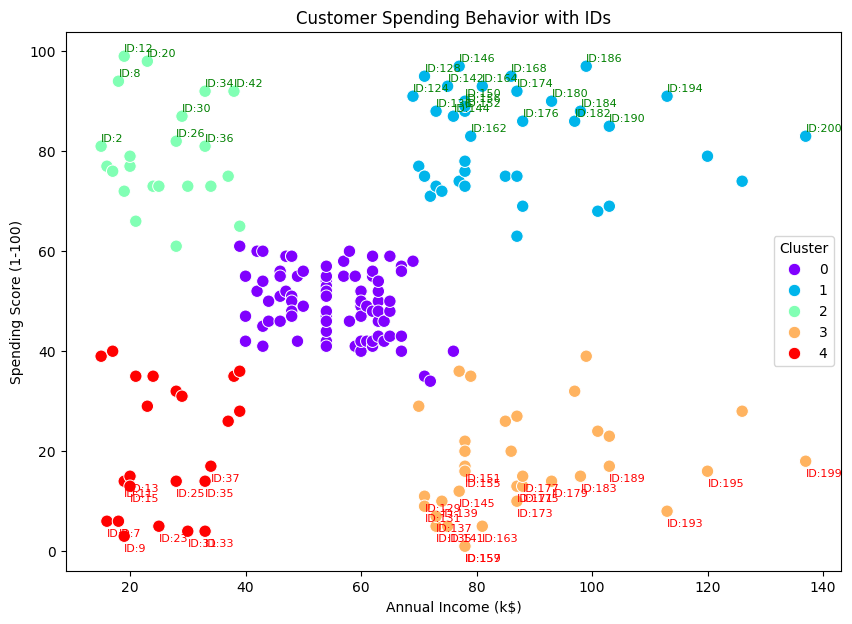

<Figure size 800x600 with 0 Axes>

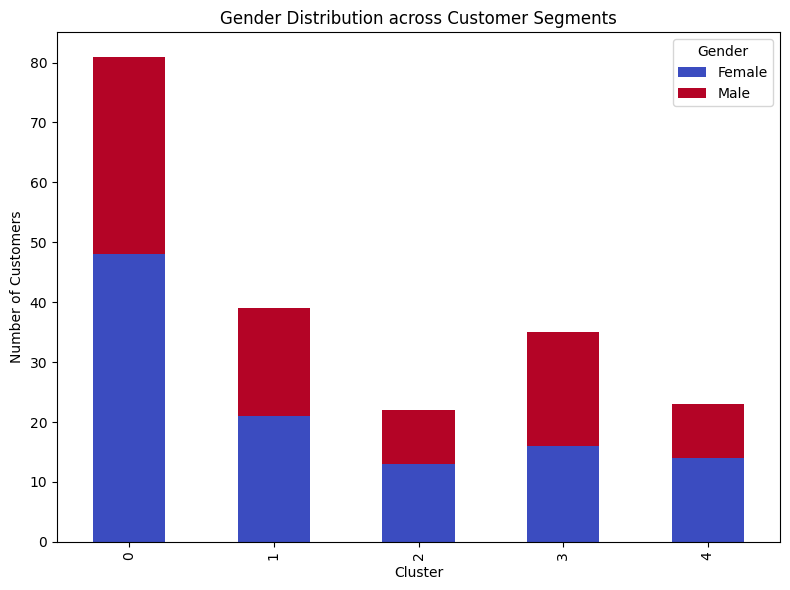


 Cluster Summary:
         Annual Income (k$)  Spending Score (1-100)  Customer_Count
Cluster                                                            
0                 55.296296               49.518519              81
1                 86.538462               82.128205              39
2                 25.727273               79.363636              22
3                 88.200000               17.114286              35
4                 26.304348               20.913043              23

 Insights:
1️ Clusters with high income and high spending score → Premium customers (target for loyalty programs).
2️ Low income but high spending score → Impulse buyers (target with discounts).
3️ High income but low spending score → Potential customers (need engagement campaigns).
4️ Gender-based patterns can help create customized marketing strategies.


In [9]:
# CUSTOMER SPENDING BEHAVIOR ANALYSIS (Part 2)
%pip install seaborn
%pip install matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data
df1 = pd.read_csv("Mall_Customers (2).csv")

# Select relevant features
X = df1[['Annual Income (k$)', 'Spending Score (1-100)']]

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df1['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(8,6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],
            c=df1['Cluster'], cmap='rainbow')
plt.title('Customer Segmentation using K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Cluster means (insights)
print(df1.groupby('Cluster')[['Annual Income (k$)','Spending Score (1-100)']].mean())

# 1️ Visualize clusters with Gender as marker
plt.figure(figsize=(10,7))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    style='Gender',
    palette='tab10',
    data=df1,
    s=100,
    alpha=0.8
)
plt.title('Customer Segmentation by Gender & Spending Pattern')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# 2️ Annotate key customers (e.g., extreme spenders / low spenders)
plt.figure(figsize=(10,7))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df1,
    palette='rainbow',
    s=80
)

# Highlight top spenders and low spenders
top_spenders = df1[df1['Spending Score (1-100)'] > 80]
low_spenders = df1[df1['Spending Score (1-100)'] < 20]

for _, row in top_spenders.iterrows():
    plt.text(row['Annual Income (k$)'], row['Spending Score (1-100)']+1,
             f"ID:{row['CustomerID']}", fontsize=8, color='green')

for _, row in low_spenders.iterrows():
    plt.text(row['Annual Income (k$)'], row['Spending Score (1-100)']-3,
             f"ID:{row['CustomerID']}", fontsize=8, color='red')

plt.title('Customer Spending Behavior with IDs')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# 3️ Cluster-wise Gender Distribution (helps interpret customer behavior)
gender_dist = df1.groupby(['Cluster', 'Gender']).size().unstack(fill_value=0)

plt.figure(figsize=(8,6))
gender_dist.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(8,6))
plt.title('Gender Distribution across Customer Segments')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# 4️ Cluster Insights Summary
cluster_summary = df1.groupby('Cluster').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID':'Customer_Count'})

print("\n Cluster Summary:")
print(cluster_summary)

print("\n Insights:")
print("1️ Clusters with high income and high spending score → Premium customers (target for loyalty programs).")
print("2️ Low income but high spending score → Impulse buyers (target with discounts).")
print("3️ High income but low spending score → Potential customers (need engagement campaigns).")
print("4️ Gender-based patterns can help create customized marketing strategies.")
